# Housing Price Prediction

## Import the modules

In [298]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np

## Download the Data

In [299]:
DATA_SOURCE = "https://github.com/ageron/data/raw/main/"
ENDPOINT = "housing.tgz"
PATH = Path("datasets/" + ENDPOINT)

In [300]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not PATH.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        
        urllib.request.urlretrieve(DATA_SOURCE + ENDPOINT, PATH)
        with tarfile.open(PATH) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    os.remove(PATH)
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [301]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [302]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [303]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [304]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


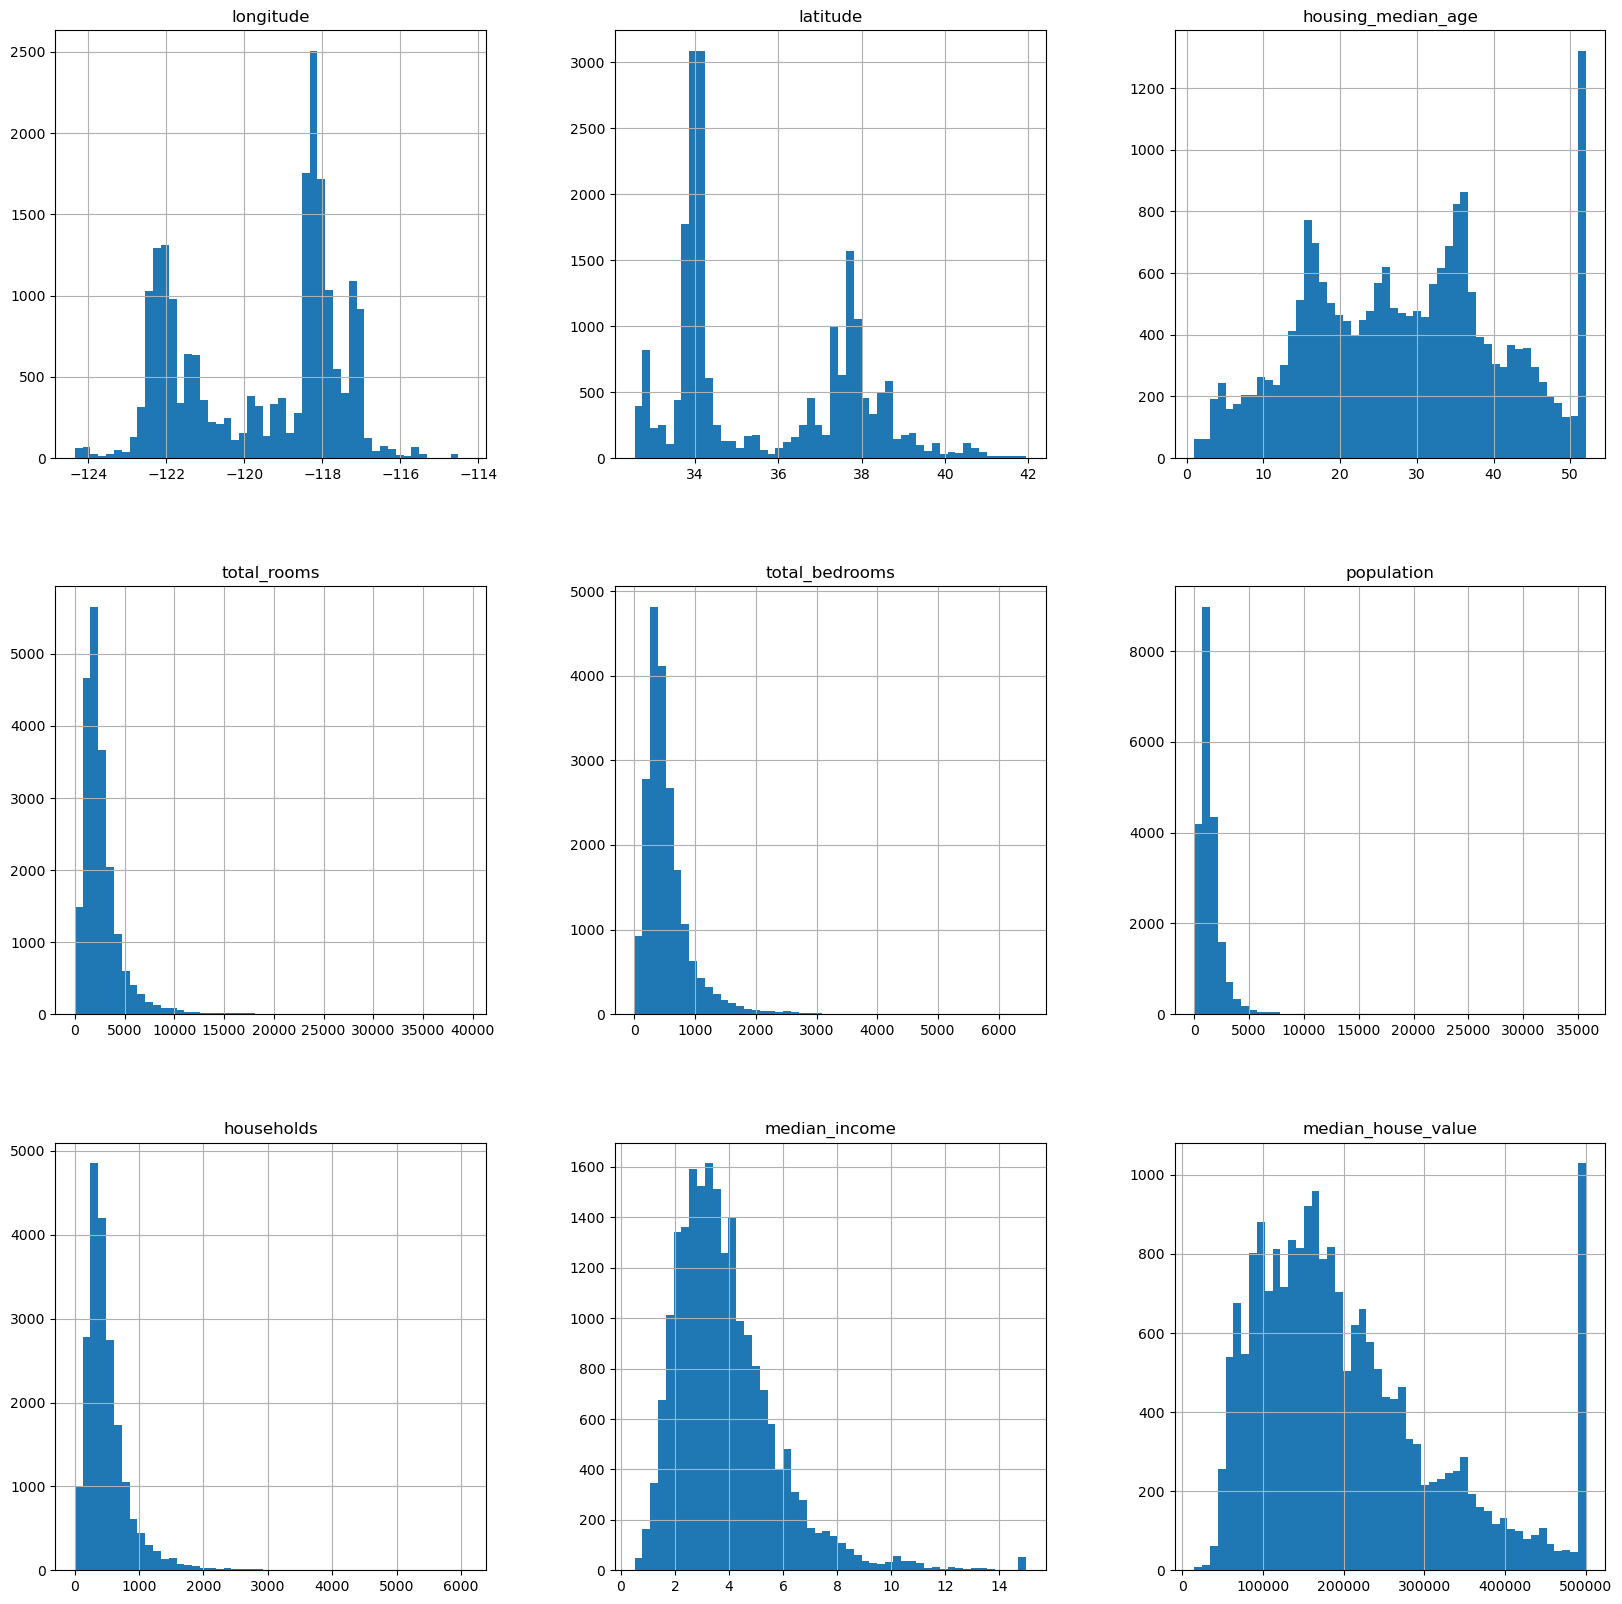

In [305]:
housing.hist(bins=50, figsize=(20, 20))
plt.show()

## Create the test set

In [306]:
# Segment based on median income groups for representative sampling
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [307]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<Axes: >

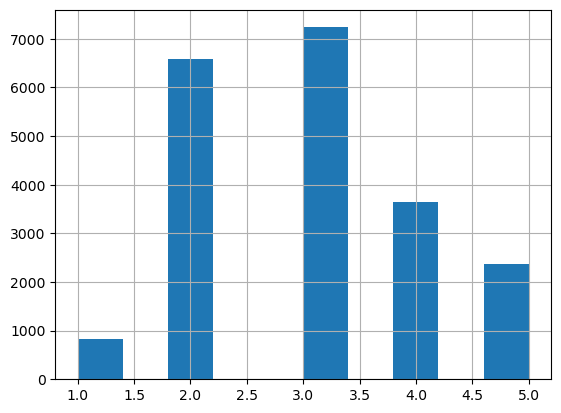

In [308]:
housing["income_cat"].hist()

In [309]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]
    

In [310]:
test_set["income_cat"].value_counts() / len(test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [311]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [312]:
train_set.drop("income_cat", axis=1, inplace=True)
test_set.drop("income_cat", axis=1, inplace=True)

## EDA

In [313]:
housing = train_set.copy()

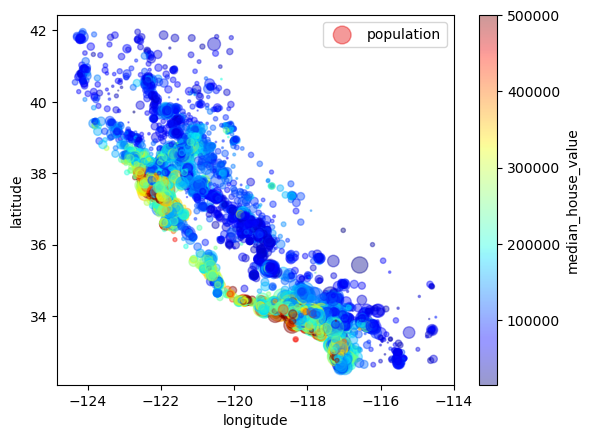

In [314]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
            s=housing["population"]/50, label="population", cmap=plt.get_cmap("jet"), colorbar=True,
            c="median_house_value")
plt.legend()

In [315]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values()

latitude             -0.139584
longitude            -0.050859
population           -0.020153
total_bedrooms        0.054635
households            0.071426
housing_median_age    0.102175
total_rooms           0.137455
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

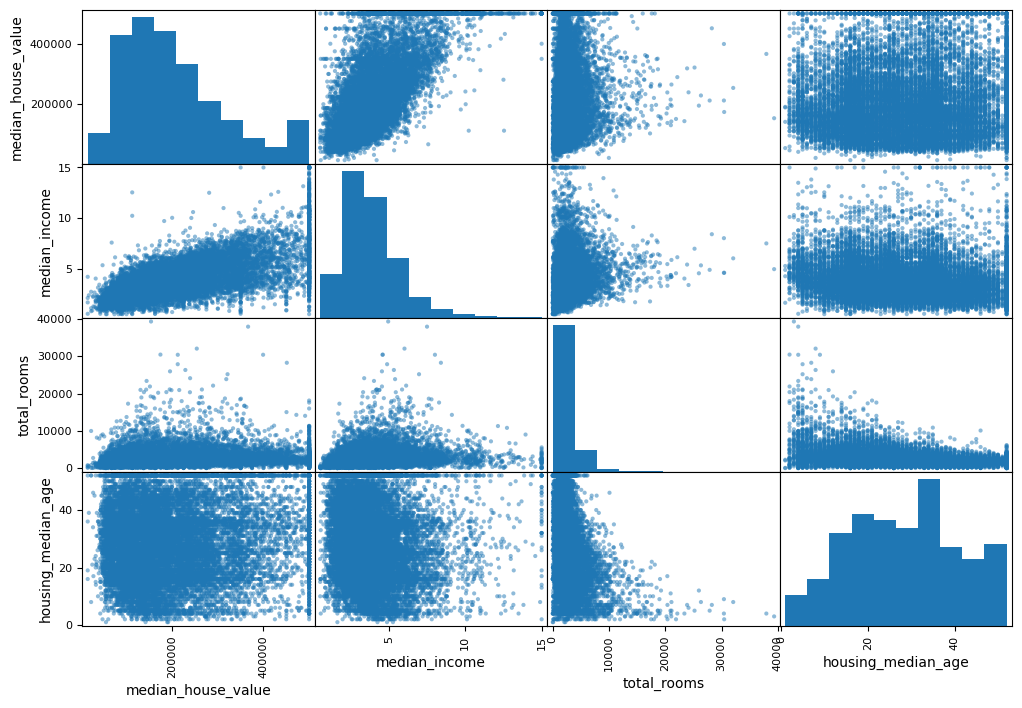

In [316]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

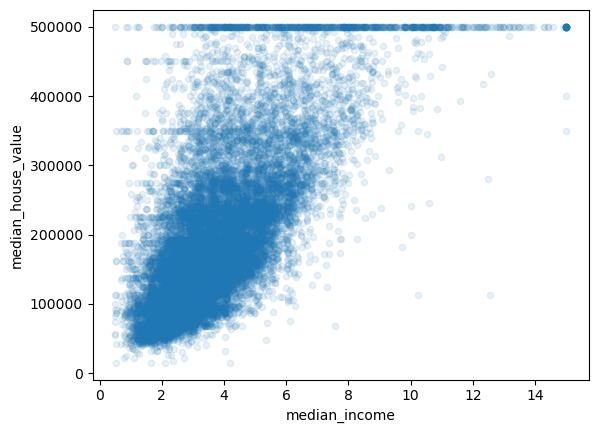

In [317]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [318]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [319]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values()

bedrooms_per_room          -0.256397
latitude                   -0.139584
longitude                  -0.050859
population_per_household   -0.038224
population                 -0.020153
total_bedrooms              0.054635
households                  0.071426
housing_median_age          0.102175
total_rooms                 0.137455
rooms_per_household         0.143663
median_income               0.688380
median_house_value          1.000000
Name: median_house_value, dtype: float64

## Data Cleaning

In [320]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

### Option 1

In [321]:
housing_option1 = housing.copy()
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)
housing_option1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16344 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16344 non-null  float64
 1   latitude            16344 non-null  float64
 2   housing_median_age  16344 non-null  float64
 3   total_rooms         16344 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16344 non-null  float64
 6   households          16344 non-null  float64
 7   median_income       16344 non-null  float64
 8   ocean_proximity     16344 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


### Option 2

In [322]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
X = imputer.fit_transform(housing_num)
housing_option2 = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_option2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Option 3

In [323]:
housing_option3 = housing.copy()
housing_option3.drop("total_bedrooms", axis=1)
housing_option3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Categorical Features

In [1]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

NameError: name 'housing' is not defined

## Scaling

In [325]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

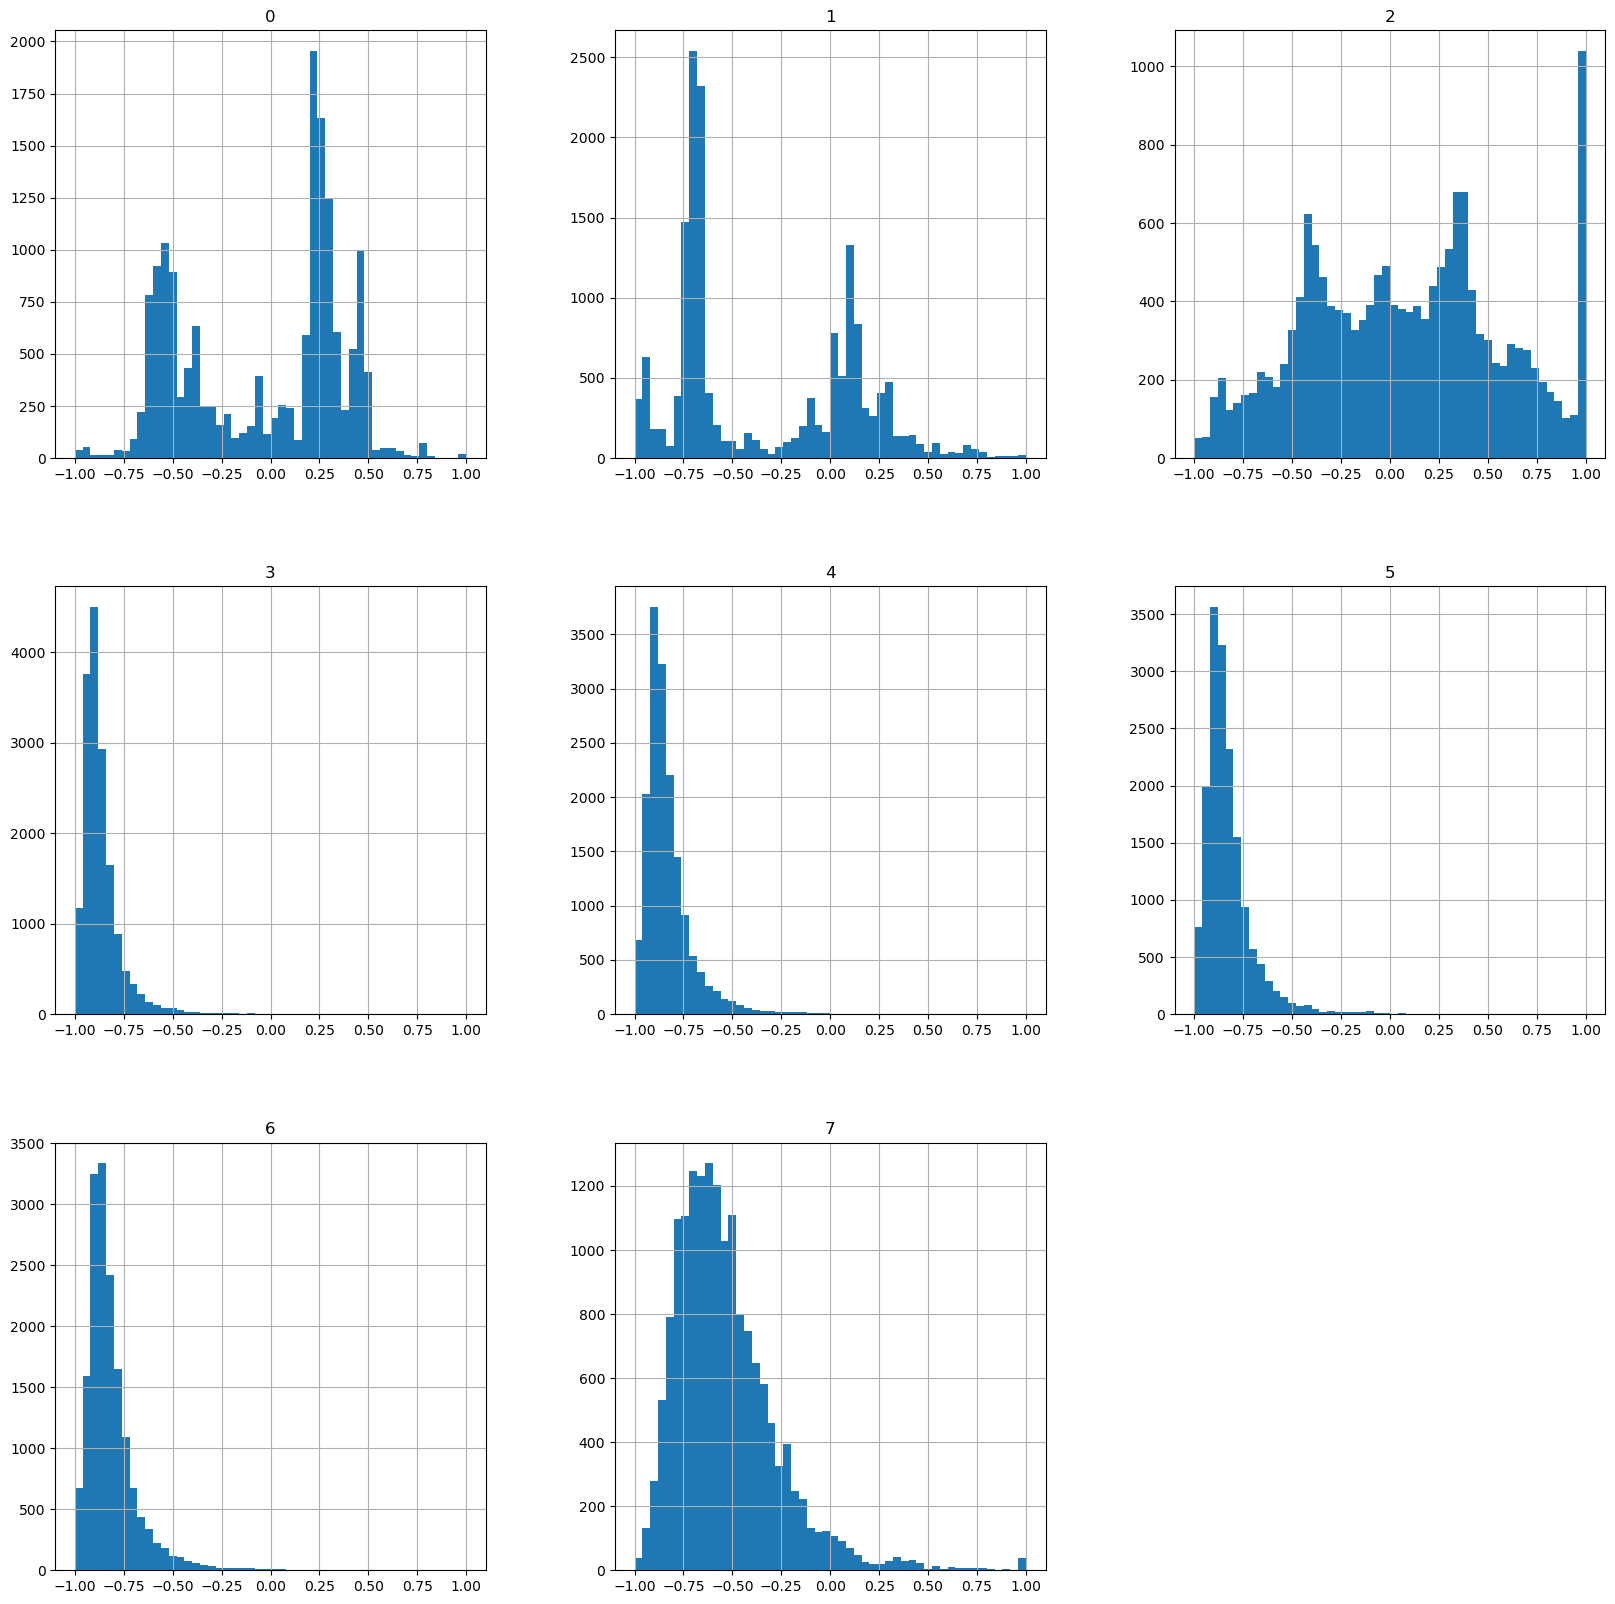

In [326]:
pd.DataFrame(housing_num_min_max_scaled).hist(bins=50, figsize=(20, 20))
plt.show()

In [327]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

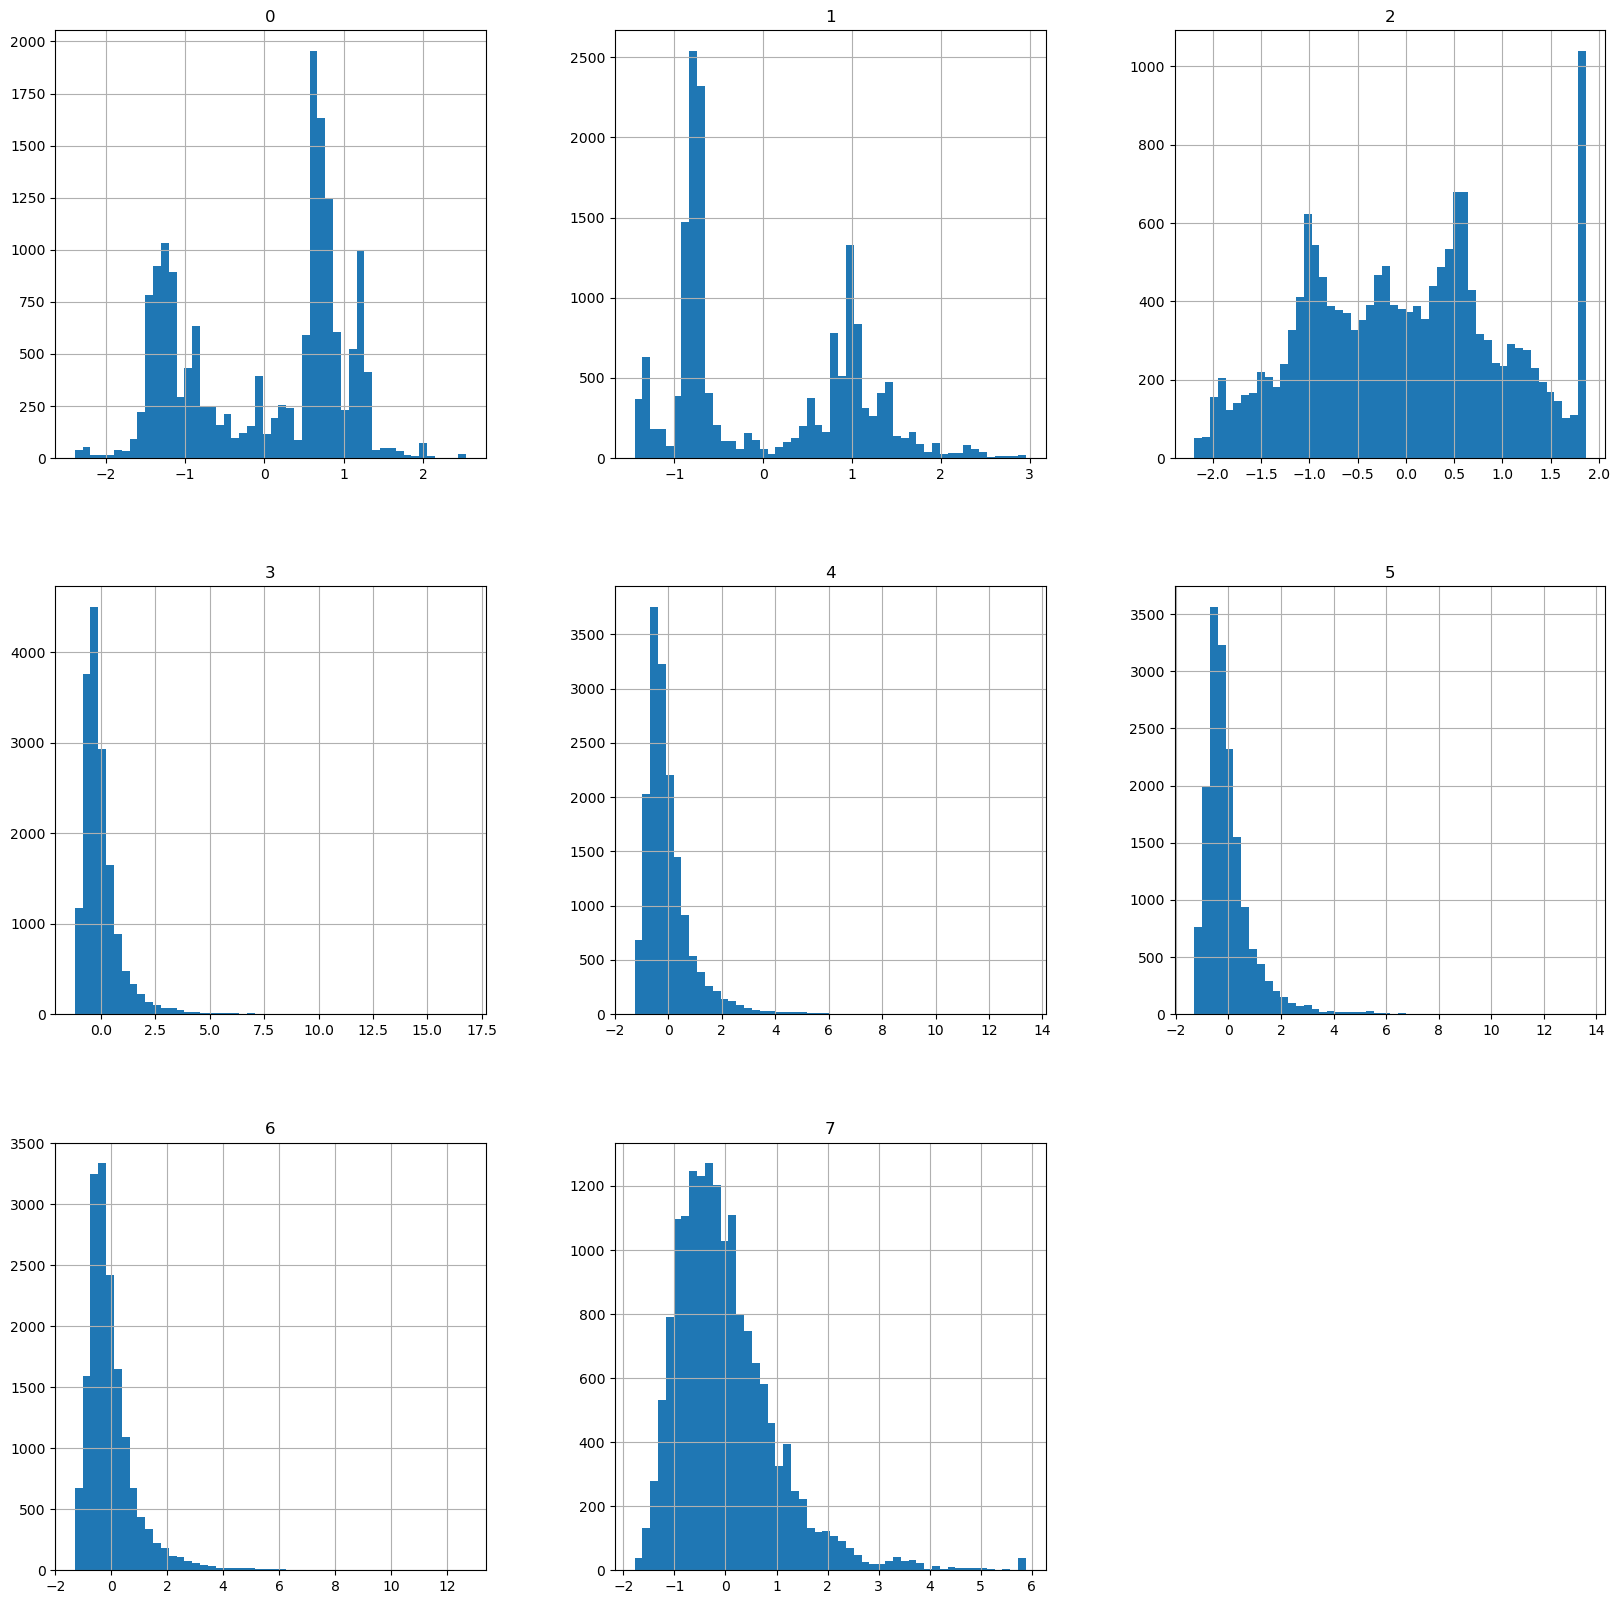

In [328]:
pd.DataFrame(housing_num_std_scaled).hist(bins=50, figsize=(20, 20))
plt.show()

In [329]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
housing_log = log_transformer.transform(housing_num[["total_bedrooms", "total_rooms", "population", "households", "median_income"]])

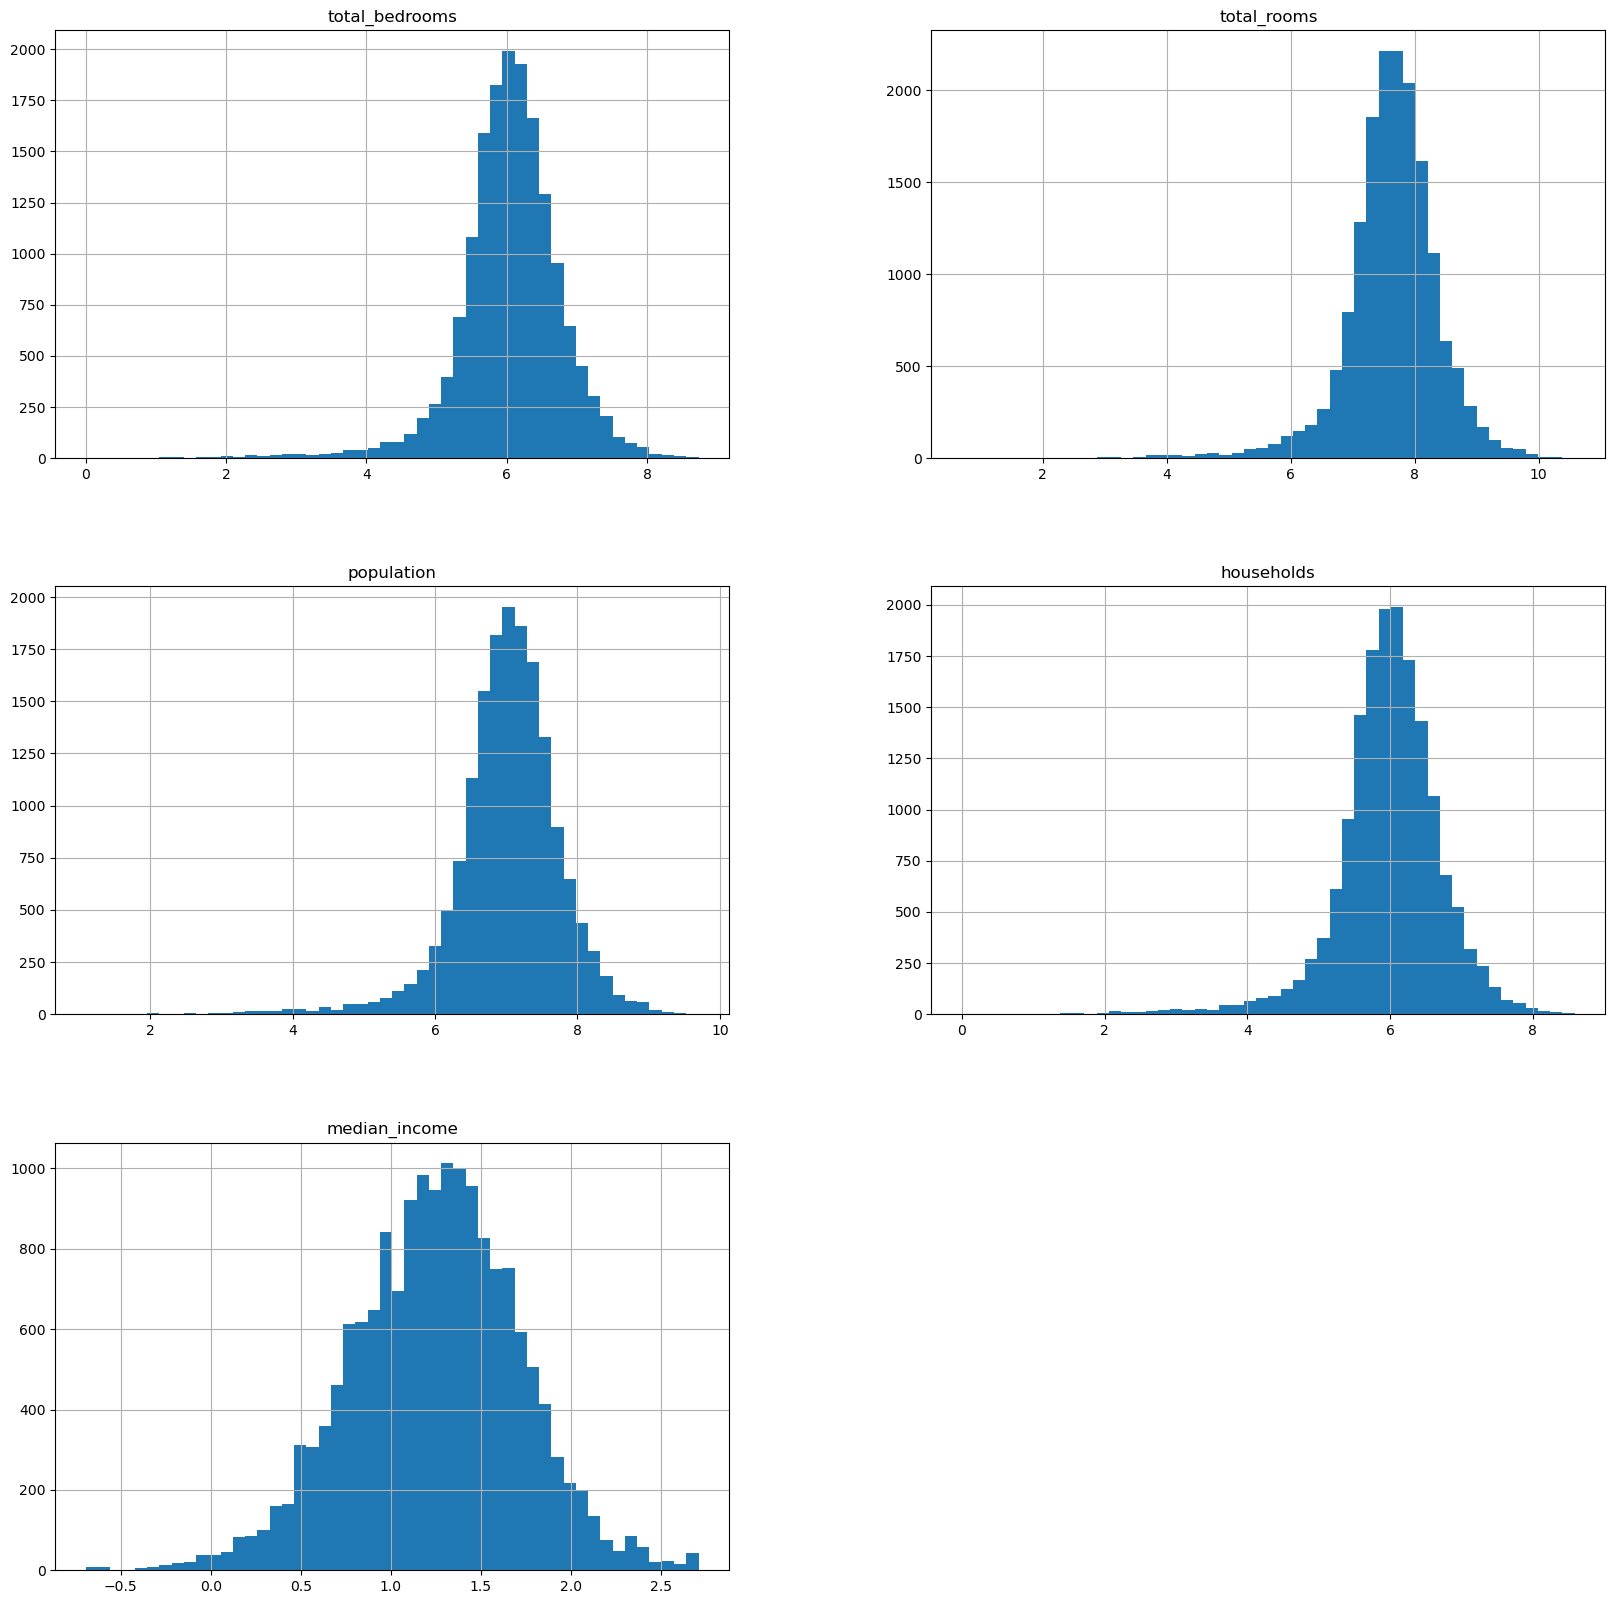

In [330]:
housing_log.hist(bins=50, figsize=(20, 20))
plt.show()

## Pipeline

In [331]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer

to_log = ["total_bedrooms", "total_rooms", "population", "households", "median_income"]
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]


class LogTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, columns_to_log):
        self.columns_to_log = columns_to_log

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = X.copy()
        result[self.columns_to_log] = np.log1p(X[self.columns_to_log])
        return result

log_transformer = LogTransformer(columns_to_log=to_log)

num_pipeline = Pipeline([
    ("log_transform", log_transformer),
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
    # Combine attrbs
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
    ], remainder="passthrough")

housing_prepared = full_pipeline.fit_transform(housing)

## Training

### Linear Model

In [333]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_prepared_data = full_pipeline.transform(some_data)
list(some_labels)

[458300.0, 483800.0, 101700.0, 96100.0, 361800.0]

In [334]:
lin_reg.predict(some_prepared_data)

array([254554.58822547, 361904.10927896, 120955.00259433, 102330.07489894,
       299707.95443316])

In [335]:
from sklearn.metrics import mean_squared_error
preds = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69237.46644265311

### Decision Trees

In [339]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
preds = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [342]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)
print(np.mean(tree_rmse_scores))

[66543.89435337 65272.35575146 66971.19074905 70770.58400086
 70017.88835581 69213.98785913 71254.61959319 69556.189307
 67711.06996225 66324.77767146]
68363.65576035663


In [343]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)
print(np.mean(tree_rmse_scores))

[70061.07842714 68782.10878137 66892.76176347 70576.87453873
 68678.54330857 70345.78074697 68689.89260808 71307.7012822
 67858.23721951 70054.61912348]
69324.75977995161


In [347]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
preds = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, preds)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18134.49607510575

In [348]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
print(forest_rmse_scores)
print(np.mean(forest_rmse_scores))

[48154.38129965 50125.92598245 47038.70821834 49230.43611037
 48623.09697848 48887.21427388 48528.68906674 49524.11531191
 48687.94650944 49081.25036638]
48788.17641176448


## Tuning

In [349]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators" : [3, 10, 30], "max_features" : [2, 4, 6, 8]},
    {"bootstrap" : [False], "n_estimators" : [3, 10], "max_features" : [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [352]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=6, n_estimators=30)


In [362]:
cat_encoded = list(full_pipeline.named_transformers_["cat"].categories_[0])
attribs = num_attribs + ["rphh", "pphh", "bdpr"] + cat_encoded
sorted(zip(grid_search.best_estimator_.feature_importances_, attribs), reverse=True)

[(0.40468286410899373, 'median_income'),
 (0.15624065308600418, 'pphh'),
 (0.12152697221509132, 'longitude'),
 (0.10667218104785912, 'latitude'),
 (0.046886849345906194, 'housing_median_age'),
 (0.044311339859391646, 'population'),
 (0.03760087275368706, 'total_rooms'),
 (0.030198433510577764, 'total_bedrooms'),
 (0.027368240886633144, 'households'),
 (0.010209462058287017, 'rphh'),
 (0.007330880041604658, '<1H OCEAN'),
 (0.0067849133831916755, 'INLAND'),
 (0.00018633770277257287, 'bdpr')]

## Evaluate

In [364]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
Y_test = test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_preds = final_model.predict(X_test_prepared)
final_rmse = np.sqrt(mean_squared_error(Y_test, final_preds))

In [365]:
final_rmse

49326.13154938824

## Exercises

### Linear SVM

In [372]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"C" : [1, 2, 3]},
]

svm = SVR(kernel="linear")
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid=[{'C': [1, 2, 3]}], return_train_score=True,
             scoring='neg_mean_squared_error')

In [370]:
svm = grid_search.best_estimator_
svm.fit(housing_prepared, housing_labels)
preds = svm.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, preds)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111337.26119526029

In [371]:
scores = cross_val_score(svm, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)
print(svm_rmse_scores)
print(np.mean(svm_rmse_scores))

[114135.90991475 114959.65914631 109621.03722232 111097.31900928
 111170.04906766 113520.42029369 112177.35955748 109807.36082555
 109166.46525861 114140.83409976]
111979.64143954063


### RBF SVM

In [373]:
param_grid = {"C" : [1, 2, 3], "gamma" : ["scale", "auto"]}
svm = SVR(kernel="rbf")
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
svm = grid_search.best_estimator_
svm.fit(housing_prepared, housing_labels)
preds = svm.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, preds)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

117368.93249366175

In [374]:
scores = cross_val_score(svm, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)
print(svm_rmse_scores)
print(np.mean(svm_rmse_scores))

[119388.66912076 120764.70935585 115105.48595473 116671.92591025
 116655.21432137 119004.80666902 117966.28723835 115104.7236897
 114246.91209072 119671.29000969]
117458.00243604374


### RandomizedSearchCV

In [375]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

distributions = { "C" : uniform(loc=0, scale=4),
                      "gamma": ["scale", "auto"]
                }
svm = SVR()
rs = RandomizedSearchCV(svm, distributions, random_state=0)
rs.fit(housing_prepared, housing_labels)
svm = grid_search.best_estimator_
svm.fit(housing_prepared, housing_labels)
preds = svm.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, preds)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

117368.93249366175